# 決定木

In [38]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [17]:
df = sns.load_dataset('tips')
# 決定木のアルゴリズム上はダミー変数化は不要だが、sklearnのアルゴリズム上は必要
df = pd.get_dummies(df, drop_first = True)
y_col = 'tip'
X = df.drop(columns = [y_col])
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [42]:
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth = 4)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [14]:
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1.1060246260428703

In [18]:
# R-Squared
model.score(X_test, y_test)

0.3590618660303134

## 決定木の可視化

In [30]:
y_train.loc[X_train[X_train['total_bill']>20.49].index].mean()

3.948

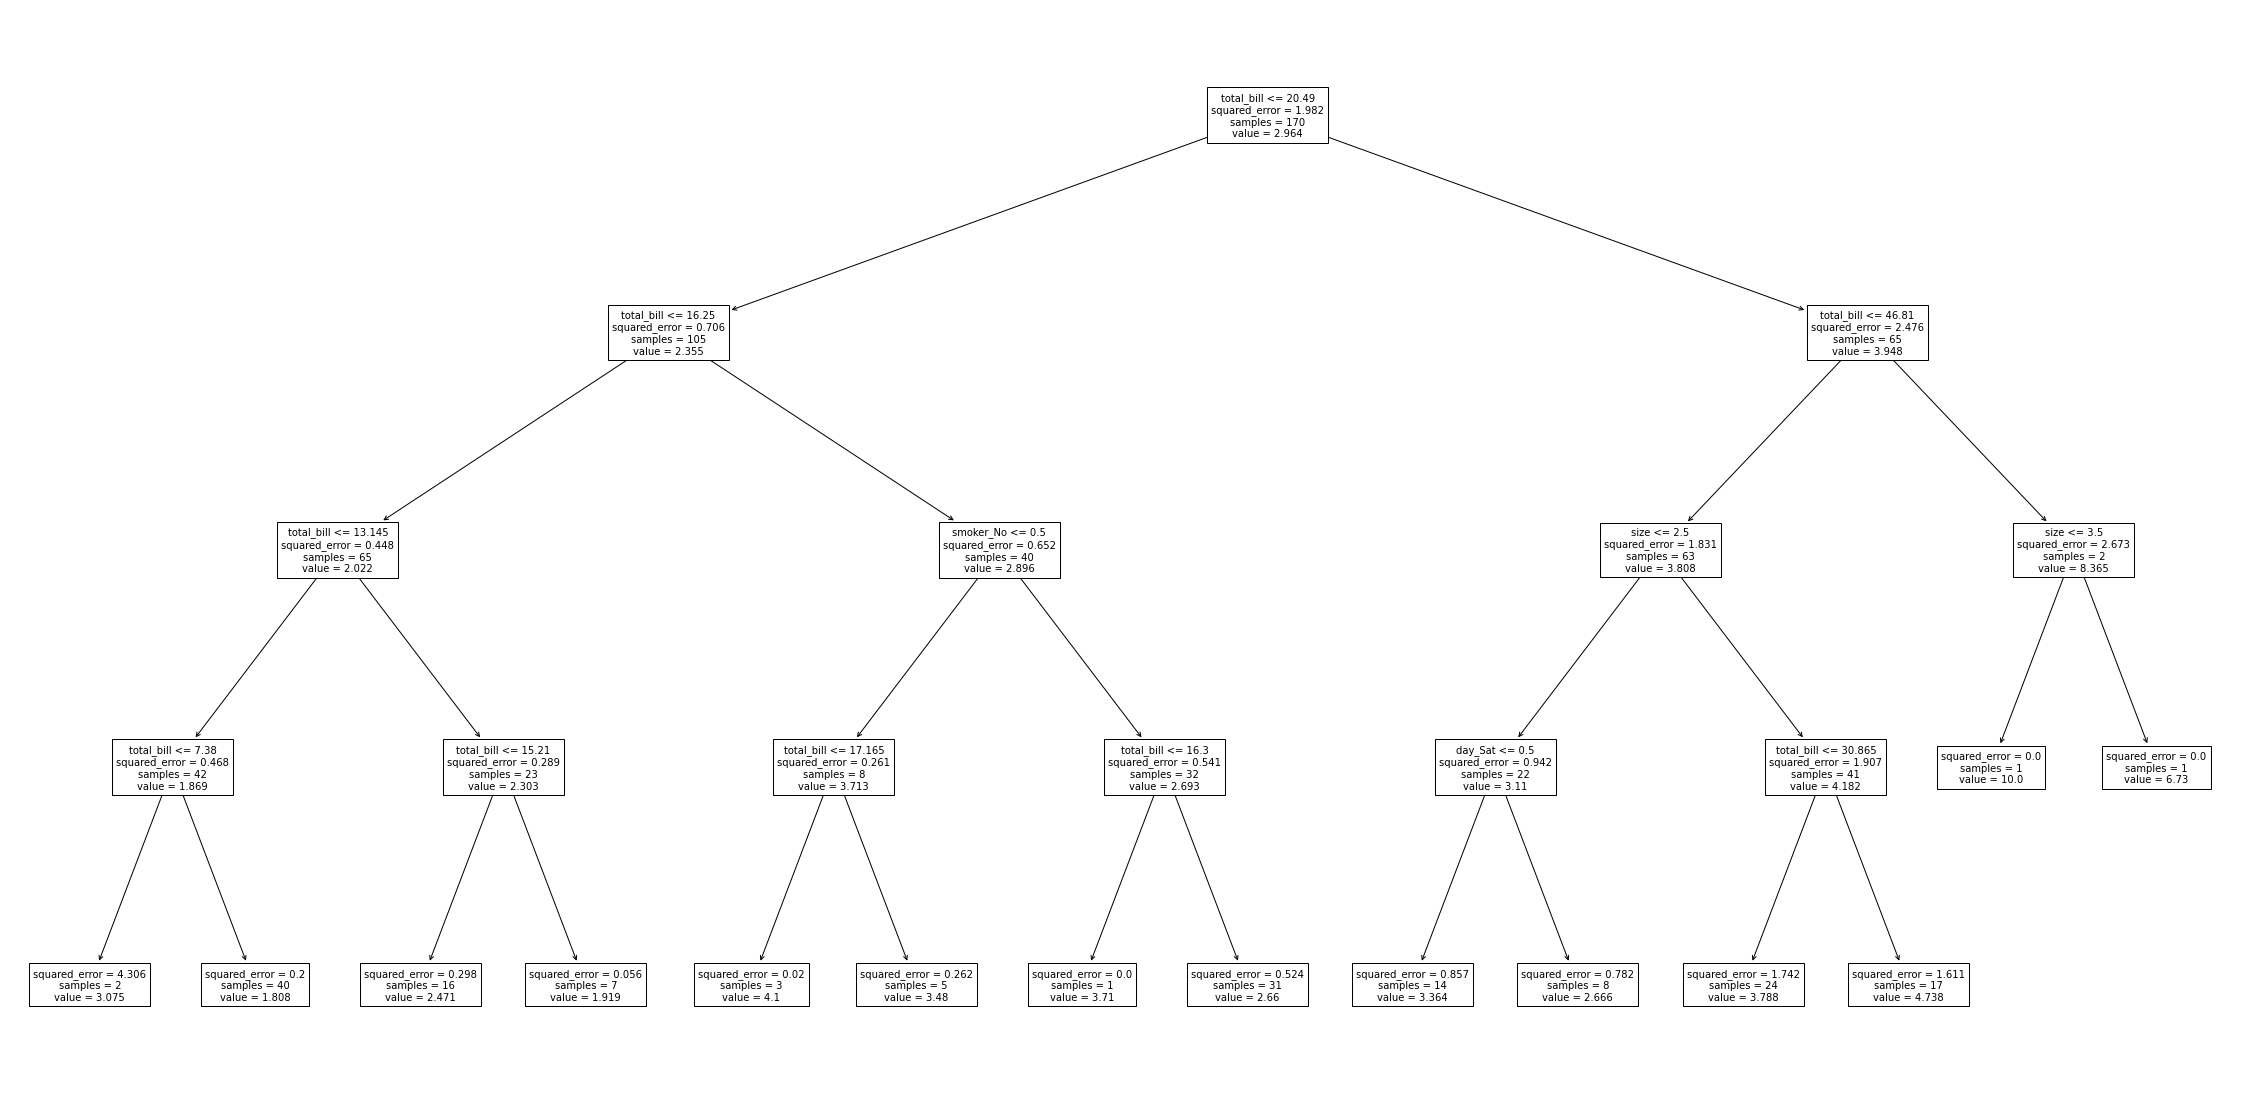

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize = (40,20))
_ = tree.plot_tree(model, fontsize = 10, feature_names = model.feature_names_in_)

In [24]:
print(tree.export_text(model, feature_names = list(model.feature_names_in_)))

|--- total_bill <= 20.49
|   |--- total_bill <= 16.25
|   |   |--- total_bill <= 13.14
|   |   |   |--- total_bill <= 7.38
|   |   |   |   |--- value: [3.08]
|   |   |   |--- total_bill >  7.38
|   |   |   |   |--- value: [1.81]
|   |   |--- total_bill >  13.14
|   |   |   |--- total_bill <= 15.21
|   |   |   |   |--- value: [2.47]
|   |   |   |--- total_bill >  15.21
|   |   |   |   |--- value: [1.92]
|   |--- total_bill >  16.25
|   |   |--- smoker_No <= 0.50
|   |   |   |--- total_bill <= 17.16
|   |   |   |   |--- value: [4.10]
|   |   |   |--- total_bill >  17.16
|   |   |   |   |--- value: [3.48]
|   |   |--- smoker_No >  0.50
|   |   |   |--- total_bill <= 16.30
|   |   |   |   |--- value: [3.71]
|   |   |   |--- total_bill >  16.30
|   |   |   |   |--- value: [2.66]
|--- total_bill >  20.49
|   |--- total_bill <= 46.81
|   |   |--- size <= 2.50
|   |   |   |--- day_Sat <= 0.50
|   |   |   |   |--- value: [3.36]
|   |   |   |--- day_Sat >  0.50
|   |   |   |   |--- value: [2.67]

## 決定木の特徴量の重要度

<BarContainer object of 8 artists>

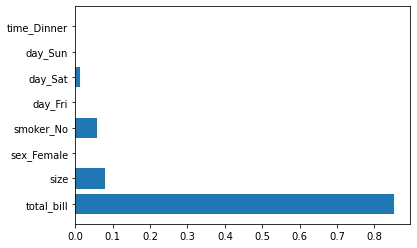

In [47]:
# 各特徴量が分割したときにどれだけ不純度(損失)を減らしたかで特徴量の重要度は決まる
plt.barh(model.feature_names_in_,model.feature_importances_)

## Minimal Cost Complexity Pruning

In [48]:
model = tree.DecisionTreeRegressor(random_state = 0)
path = model.cost_complexity_pruning_path(X_train, y_train)

In [51]:
eff_alphas = path.ccp_alphas

In [56]:
eff_alphas

array([0.00000000e+00, 1.04491579e-17, 1.56737368e-17, 4.41176471e-07,
       1.17647059e-06, 1.76470588e-06, 2.64705882e-06, 2.64705882e-06,
       2.64705882e-06, 2.64705882e-06, 2.64705882e-06, 2.64705882e-06,
       2.64705882e-06, 2.64705882e-06, 3.67647059e-06, 7.35294118e-06,
       1.05882353e-05, 1.44117647e-05, 1.88235294e-05, 2.94117647e-05,
       4.23529412e-05, 5.76470588e-05, 5.76470588e-05, 7.52941176e-05,
       8.24509804e-05, 8.50000000e-05, 9.92647059e-05, 1.06176471e-04,
       1.29705882e-04, 1.34215686e-04, 1.42352941e-04, 1.69411765e-04,
       1.83823529e-04, 1.89803922e-04, 1.89803922e-04, 2.01323529e-04,
       2.14411765e-04, 2.16568627e-04, 2.33382353e-04, 2.40941176e-04,
       3.07247899e-04, 3.20294118e-04, 3.52941176e-04, 3.89117647e-04,
       4.10000000e-04, 4.52235294e-04, 4.94215686e-04, 5.50784314e-04,
       5.57098039e-04, 5.81252101e-04, 5.93137255e-04, 7.35294118e-04,
       7.65974026e-04, 7.94117647e-04, 8.71911765e-04, 9.80392157e-04,
      

In [52]:
models = []
for eff_alpha in eff_alphas:
    model = tree.DecisionTreeRegressor(random_state = 0, ccp_alpha = eff_alpha)
    model.fit(X_train, y_train)
    models.append(model)

In [54]:
train_scores = [mean_squared_error(y_train ,model.predict(X_train)) for model in models]
test_scores = [mean_squared_error(y_test ,model.predict(X_test)) for model in models]

Text(0, 0.5, 'mse')

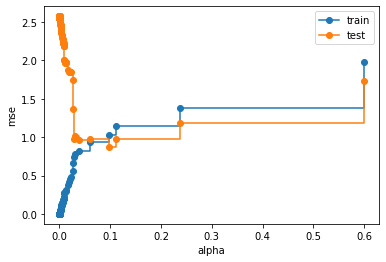

In [55]:
plt.plot(eff_alphas, train_scores, marker = 'o', label = 'train', drawstyle = 'steps-post')
plt.plot(eff_alphas, test_scores, marker = 'o', label = 'test', drawstyle = 'steps-post')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('mse')